# Todo

* fix all the errors
* clean up this notebook

# imports

# Cl51 Cloud Product (level 1 [former level 0] Ceilometer product)

## operational usage

the installation of ceilopy will install a script in your environment called cl51cloudprod which executes something similar to the lines below

In [16]:
import ceilopy as cp

In [17]:
reload(cp)
reload(cp.ceilolab)

<module 'ceilopy.ceilolab' from '/export/htelg/prog/ceilopy/ceilopy/ceilolab.py'>

In [18]:
# generate the instance that takes care of processing everything
cpp = cp.Cl51CloudProdProcessor(ignore=['plots'], 
                                # verbose=True,
                                p2fl_in='/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/',
                                p2fl_out='bla/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev1/',
                                )

In [21]:
cpp.workplan = cpp.workplan.truncate('2021-10-16')

In [23]:
cpp.workplan.iloc[0].path2fn_out

PosixPath('/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/cbc/2022/cbc.cl51.cloud_prod.20220120.nc')

In [15]:
cpp.workplan.iloc[5].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/hist/202202_CEILOMETER_1_LEVEL_3_DEFAULT_05.his')

In [13]:
cpp.workplan.iloc[3].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201200000_r1350815.nc')

In [5]:
# remove the first error (the Helsinki case)
cpp.workplan = cpp.workplan[2:] 

In [6]:
out = cpp.process(generate_missing_folders=True, error_handling='return', )

HDF5-DIAG: Error detected in HDF5 (1.14.0) thread 1:
  #000: H5D.c line 1069 in H5Dread(): can't synchronously read data
    major: Dataset
    minor: Read failed
  #001: H5D.c line 1013 in H5D__read_api_common(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5VLcallback.c line 2092 in H5VL_dataset_read_direct(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLcallback.c line 2048 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #004: H5VLnative_dataset.c line 361 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dio.c line 370 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #006: H5Dchunk.c line 2833 in H5D__chunk_read(): error looking up chunk address
    major: Dataset
    minor: Can't get value
  #007: H5Dchunk.c line 3813 in H5D__chunk_lookup(): can't query chunk address
    major: Dataset
   

In [7]:
#cpp.notify()

In [8]:
len(out['errors'])
# out['errors']

17

In [9]:
df = pd.concat(out['errror_grp'])
df = df[df.file_type == 'bl']
# df

In [10]:
# backends = ['netcdf4', 'h5netcdf', 'scipy', 'gini']
engines = ["netcdf4", "scipy", "pydap", "h5netcdf", "pynio", "pseudonetcdf", "zarr"]

In [11]:
for p2f in df.path2raw:
    # break
    try:
        ds = xr.open_dataset(p2f, engine=engines[0])
        ds.compute()
        # print(f"{p2f.name}\t\t OK")
    except Exception as e:
        print(f"{p2f.name}\t\t {e}")

L1_CBC_202201200000_r1350815.nc		 NetCDF: HDF error
L1_CBC_202202050000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202202050000_r1350815.nc'
L1_CBC_202202230000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202202230000_r1350815.nc'
L1_CBC_202204190000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202204190000_r1350815.nc'
L1_CBC_202205180000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202205180000_r1350815.nc'
L1_CBC_202210100000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202210100000_r1350815.nc'
L1_CBC_202211190000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202211190000_r1350815.nc'
L1_CBC_20221

In [14]:
for p2f in df.path2raw:
    # break
    try:
        ds = xr.open_dataset(p2f)#, engine=engines[3])
        ds.compute()
        # print(f"{p2f.name}\t\t OK")
    except Exception as e:
        print(f"{p2f.name}\t\t {e}")

L1_CBC_202201200000_r1350815.nc		 NetCDF: HDF error
L1_CBC_202202050000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202202050000_r1350815.nc'
L1_CBC_202202230000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202202230000_r1350815.nc'
L1_CBC_202204190000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202204190000_r1350815.nc'
L1_CBC_202205180000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202205180000_r1350815.nc'
L1_CBC_202210100000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202210100000_r1350815.nc'
L1_CBC_202211190000_r1350815.nc		 [Errno -101] NetCDF: HDF error: '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202211190000_r1350815.nc'
L1_CBC_20221

In [14]:
for p2f in df.path2raw:
    # break
    try:
        ds = xr.open_dataset(p2f, engine=engines[3])
        ds.compute()
        print(f"{p2f.name}\t\t OK")
    except Exception as e:
        print(f"{p2f.name}\t\t {e}")

L1_CBC_202201200000_r1350815.nc		 Can't synchronously read data (wrong B-tree signature)
L1_CBC_202201201638_r1350815.nc		 OK
L1_CBC_202202050000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16767898, sblock->base_addr = 0, stored_eof = 16768823)
L1_CBC_202202230000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16767898, sblock->base_addr = 0, stored_eof = 16768823)
L1_CBC_202204190000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16774354, sblock->base_addr = 0, stored_eof = 16775075)
L1_CBC_202205180000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16755598, sblock->base_addr = 0, stored_eof = 16756319)
L1_CBC_202210100000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16768822, sblock->base_addr = 0, stored_eof = 16768823)
L1_CBC_202211190000_r1350815.nc		 Unable to synchronously open file (truncated file: eof = 16767898, sblock->base_addr = 0, stored_eof = 16

In [34]:
ds = xr.open_dataset('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201201638_r1350815.nc', engine=engines[7])# 0,3

IndexError: list index out of range

In [30]:
ds.compute()

<xarray.Dataset>
Dimensions:             (timeDim: 736, nameDim: 1, range: 1540,
                         message_typeDim: 1, versionDim: 1, date_stampDim: 1,
                         periodDim: 1, tilt_angleDim: 1, cloud_statusDim: 1,
                         cloud_dataDim: 3, status_bitsDim: 1,
                         profile_scaleDim: 1, profile_resolutionDim: 1,
                         profile_lengthDim: 1)
Coordinates:
  * range               (range) int32 10 20 30 40 50 ... 15370 15380 15390 15400
Dimensions without coordinates: timeDim, nameDim, message_typeDim, versionDim,
                                date_stampDim, periodDim, tilt_angleDim,
                                cloud_statusDim, cloud_dataDim, status_bitsDim,
                                profile_scaleDim, profile_resolutionDim,
                                profile_lengthDim
Data variables: (12/14)
    time                (timeDim) int32 1642696728 1642696764 ... 1642723197
    name                (timeDim, nameDim) object 'CEILOMETER_1' ... 'CEILOME...
    message_type        (timeDim, message_typeDim) int32 16 16 16 ... 16 16 16
    version             (timeDim, versionDim) int32 103 103 103 ... 103 103 103
    date_stamp          (timeDim, date_stampDim) object '2022-01-20 16:38:48'...
    period              (timeDim, periodDim) int32 36000 36000 ... 36000 36000
    ...                  ...
    cloud_data          (timeDim, cloud_dataDim) float32 0.0 0.0 0.0 ... 0.0 0.0
    status_bits         (timeDim, status_bitsDim) object '000000000080' ... '...
    profile_scale       (timeDim, profile_scaleDim) int32 100 100 ... 100 100
    profile_resolution  (timeDim, profile_resolutionDim) int32 10 10 ... 10 10
    profile_length      (timeDim, profile_lengthDim) int32 1540 1540 ... 1540
    rcs_910             (timeDim, range) int32 16 16 15 15 ... -110 -186 817
Attributes:
    site_location:    r1350815
    instrument_type:  CL31
    latitude:         38.8589
    longitude:        -106.921
    altitude:         2729
    offset:           -7

## testing and bug fixing

For testing you can use a particular test scenario (test = 1,2,...) or specify a particular output path from the workplan. By using the kwarg error_handling='raise' errors will not be suppressed. And there is of course the verbose, which does not print too much these days ... I think.

In [1]:
import ceilopy as cp

In [2]:
reload(cp)
reload(cp.ceilolab)

<module 'ceilopy.ceilolab' from '/export/htelg/prog/ceilopy/ceilopy/ceilolab.py'>

In [3]:
# generate the instance that takes care of processing everything
cpp = cp.Cl51CloudProdProcessor(ignore=['plots'], 
                                # verbose=True,
                                p2fl_in='/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/',
                                p2fl_out='/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/',
                                )

In [4]:
# remove the first error (the Helsinki case)
cpp.workplan = cpp.workplan[2:] 

In [5]:
# %%debug -b /mnt/telg/prog/ceilopy/ceilopy/ceilolab.py:48
# process whats on the server
cpp.process(
    test=1,
    path2fn_out=None,
    generate_missing_folders=False,
    error_handling='raise',
    error_handling_serial='allow_empty',
    verbose=True,)

	 path2fn_out: /nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/cbc/2022/cbc.cl51.cloud_prod.20220120.nc -                     file_type  \
2022-01-20 00:00:00      hist   
2022-01-20 00:00:00        bl   
2022-01-20 16:38:00        bl   

                                                              path2raw site  \
2022-01-20 00:00:00  /nfs/grad/gradobs/raw/short_term/sailsplash/Ce...  cbc   
2022-01-20 00:00:00  /nfs/grad/gradobs/raw/short_term/sailsplash/Ce...  cbc   
2022-01-20 16:38:00  /nfs/grad/gradobs/raw/short_term/sailsplash/Ce...  cbc   

                          date  \
2022-01-20 00:00:00 2022-01-20   
2022-01-20 00:00:00 2022-01-20   
2022-01-20 16:38:00 2022-01-20   

                                                           path2fn_out  
2022-01-20 00:00:00  /nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...  
2022-01-20 00:00:00  /nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...  
2022-01-20 16:38:00  /nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...  


HDF5-DIAG: Error detected in HDF5 (1.14.0) thread 1:
  #000: H5D.c line 1069 in H5Dread(): can't synchronously read data
    major: Dataset
    minor: Read failed
  #001: H5D.c line 1013 in H5D__read_api_common(): can't read data
    major: Dataset
    minor: Read failed
  #002: H5VLcallback.c line 2092 in H5VL_dataset_read_direct(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #003: H5VLcallback.c line 2048 in H5VL__dataset_read(): dataset read failed
    major: Virtual Object Layer
    minor: Read failed
  #004: H5VLnative_dataset.c line 361 in H5VL__native_dataset_read(): can't read data
    major: Dataset
    minor: Read failed
  #005: H5Dio.c line 370 in H5D__read(): can't read data
    major: Dataset
    minor: Read failed
  #006: H5Dchunk.c line 2833 in H5D__chunk_read(): error looking up chunk address
    major: Dataset
    minor: Can't get value
  #007: H5Dchunk.c line 3813 in H5D__chunk_lookup(): can't query chunk address
    major: Dataset
   

RuntimeError: NetCDF: HDF error

In [6]:
cpp.tp_retriever.tp_file.iloc[0]

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201200000_r1350815.nc')

In [60]:
print(row.path2raw.stat().st_size/1e3, end = '\t')
print(row.path2raw.name)

36.223	202111_CEILOMETER_1_LEVEL_3_DEFAULT_09.his


# Fixing a corrupt file!

In [ ]:
# first make a copy of the file
# test if any variable h

## is it suspiciously small? - no

In [7]:
for idx, row in cpp.workplan[:15].iterrows():
    print(row.path2raw.stat().st_size/1e3, end = '\t')
    print(row.path2raw.name)
    # break

871.035	202201_CEILOMETER_1_LEVEL_3_DEFAULT_20.his
11530.883	L1_CBC_202201200000_r1350815.nc
5199.039	L1_CBC_202201201638_r1350815.nc
883.772	202202_CEILOMETER_1_LEVEL_3_DEFAULT_05.his
16767.898	L1_CBC_202202050000_r1350815.nc
16767.898	L1_CBC_202202230000_r1350815.nc
891.064	202202_CEILOMETER_1_LEVEL_3_DEFAULT_23.his
19338.051	L1_CBC_202203160000_r1350815.nc
1014.385	202203_CEILOMETER_1_LEVEL_3_DEFAULT_16.his
1050.531	202203_CEILOMETER_1_LEVEL_3_DEFAULT_20.his
20220.727	L1_CBC_202203200000_r1350815.nc
0.0	L1_CKP_202204090000_r1350816.nc
877.455	202204_CEILOMETER_1_LEVEL_3_DEFAULT_09.his
875.69	202204_CEILOMETER_1_LEVEL_3_DEFAULT_10.his
0.0	L1_CKP_202204100000_r1350816.nc


## Can I read any of the variables? -- only time?!?

In [42]:
# fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201200000_r1350815.nc'
# ds = xr.open_dataset('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201200000_r1350815.nc')

In [1]:
fn = '/export/htelg/tmp/nccorrupt/L1_CBC_202201200000_r1350815.nc'

In [2]:
ds = xr.open_dataset(fn, engine='h5netcdf')

In [3]:
for var in ds:
    print(var, end = '\t')
    try:
        ds[var].values
        print('success')
    except:
        print('CORRUPT')

time	success
name	CORRUPT
message_type	CORRUPT
version	CORRUPT
date_stamp	CORRUPT
period	CORRUPT
tilt_angle	CORRUPT
cloud_status	CORRUPT
cloud_data	CORRUPT
status_bits	CORRUPT
profile_scale	CORRUPT
profile_resolution	CORRUPT
profile_length	CORRUPT
rcs_910	CORRUPT


In [5]:
for var in ds:
    print(var, end = '\t')
    try:
        ds[var].values
        print('success')
    except:
        print('CORRUPT')

time	success
name	CORRUPT
message_type	CORRUPT
version	CORRUPT
date_stamp	CORRUPT
period	CORRUPT
tilt_angle	CORRUPT
cloud_status	CORRUPT
cloud_data	CORRUPT
status_bits	CORRUPT
profile_scale	CORRUPT
profile_resolution	CORRUPT
profile_length	CORRUPT
rcs_910	CORRUPT


In [52]:
for var in ds:
    print(var, end = '\t')
    try:
        ds[var].values
        print('success')
    except:
        print('CORRUPT')

time	success
name	CORRUPT
message_type	CORRUPT
version	CORRUPT
date_stamp	CORRUPT
period	CORRUPT
tilt_angle	CORRUPT
cloud_status	CORRUPT
cloud_data	CORRUPT
status_bits	CORRUPT
profile_scale	CORRUPT
profile_resolution	CORRUPT
profile_length	CORRUPT
rcs_910	CORRUPT


# Can I use h5py to read something?

In [4]:
import h5py

In [ ]:
h5py.

## simple check if it can read it

In [11]:
fn = '/export/htelg/tmp/L1_CBC_202201200000_r1350815.nc'

In [12]:
with h5py.File(fn, 'r') as f:
    # Explore the file structure and try to read datasets
    for name in f:
        print(name)
        data = f[name][...]

cloud_data


OSError: Can't synchronously read data (wrong B-tree signature)

In [20]:
ignore1 = ['name','message_type','version','date_stamp',
           'period','tilt_angle',
          'cloud_status','cloud_data','status_bits','profile_scale',
          'profile_resolution','profile_length']

In [9]:
dsc = xr.open_mfdataset(cpp.tp_retriever.tp_file, drop_variables=ignore1, concat_dim = 'timeDim', combine='nested')

In [41]:
cpp.tp_retriever.tp_file.iloc[0]

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202201200000_r1350815.nc')

In [39]:
cpp.tp_retriever.tp_file.iloc[0].stat()

os.stat_result(st_mode=33277, st_ino=4687605493, st_dev=49, st_nlink=1, st_uid=0, st_gid=500, st_size=11530883, st_atime=1642696624, st_mtime=1642696624, st_ctime=1668469559)

In [40]:
cpp.tp_retriever.tp_file.iloc[1].stat()

os.stat_result(st_mode=33277, st_ino=4687989663, st_dev=49, st_nlink=1, st_uid=0, st_gid=500, st_size=5199039, st_atime=1642723291, st_mtime=1642723291, st_ctime=1668469559)

In [25]:
ds1 = xr.open_dataset(cpp.tp_retriever.tp_file.iloc[0], drop_variables = ignore1)

In [35]:
ds1 = xr.open_dataset(cpp.tp_retriever.tp_file.iloc[0],
                      # drop_variables = ignore1,
                      chunks=None)

In [36]:
ds1.load()

RuntimeError: NetCDF: HDF error

In [33]:
# ds1.rcs_910.compute()

In [34]:
ds1.rcs_910.plot()

RuntimeError: NetCDF: HDF error

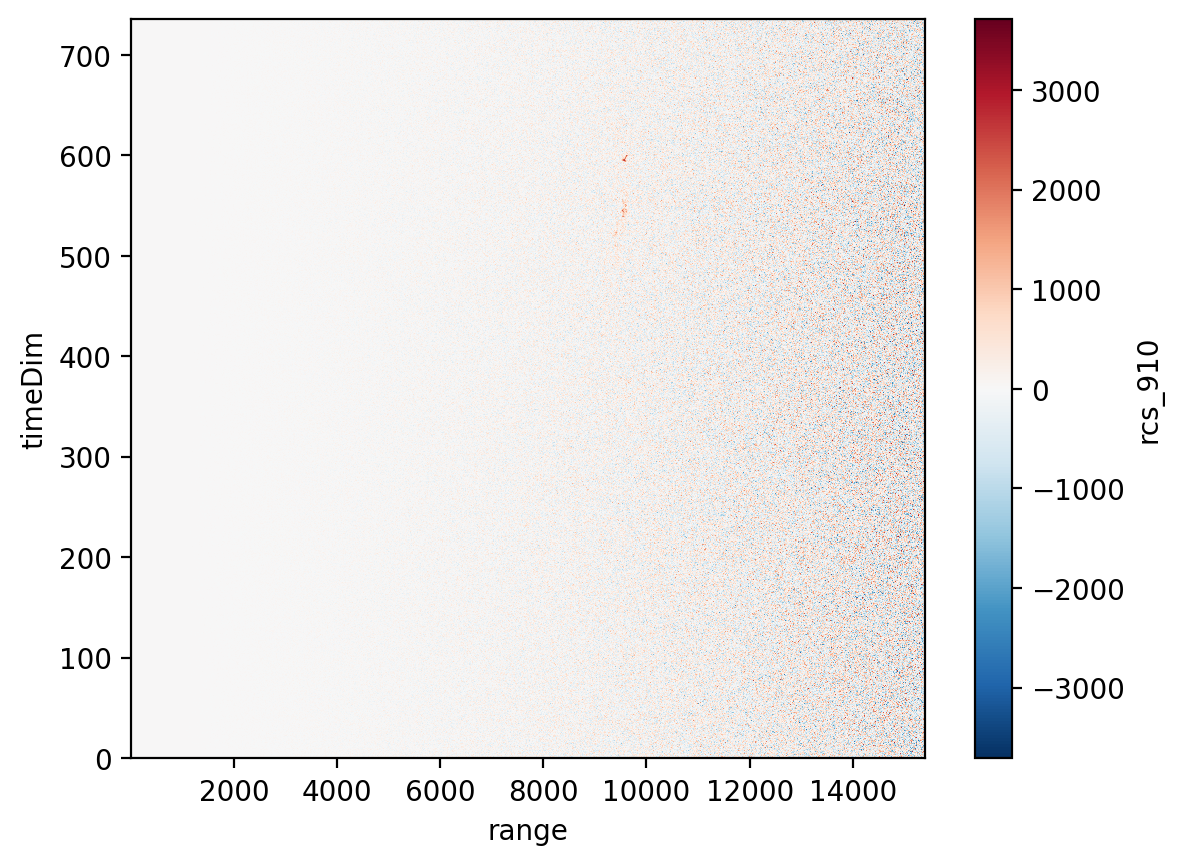

In [24]:
ds2.rcs_910.plot()

In [21]:
ds2 = xr.open_dataset(cpp.tp_retriever.tp_file.iloc[1], drop_variables = ignore1)

In [12]:
# dsc.rcs_910.plot()
ds1.rcs_910.plot()

RuntimeError: NetCDF: HDF error

In [64]:
ds1

<xarray.Dataset>
Dimensions:  (timeDim: 1602, range: 1540)
Coordinates:
  * range    (range) int32 10 20 30 40 50 60 ... 15360 15370 15380 15390 15400
Dimensions without coordinates: timeDim
Data variables:
    time     (timeDim) int32 ...
    rcs_910  (timeDim, range) int32 ...
Attributes:
    site_location:    r1350815
    instrument_type:  CL31
    latitude:         38.8589
    longitude:        -106.921
    altitude:         2729
    offset:           -7

In [60]:
# dsc = 
xr.concat([ds1,ds2], dim = 'timeDim')

RuntimeError: NetCDF: HDF error

In [61]:
ds1

<xarray.Dataset>
Dimensions:  (timeDim: 1602, range: 1540)
Coordinates:
  * range    (range) int32 10 20 30 40 50 60 ... 15360 15370 15380 15390 15400
Dimensions without coordinates: timeDim
Data variables:
    time     (timeDim) int32 ...
    rcs_910  (timeDim, range) int32 ...
Attributes:
    site_location:    r1350815
    instrument_type:  CL31
    latitude:         38.8589
    longitude:        -106.921
    altitude:         2729
    offset:           -7

In [52]:
ds2

<xarray.Dataset>
Dimensions:  (timeDim: 736, range: 1540)
Coordinates:
  * range    (range) int32 10 20 30 40 50 60 ... 15360 15370 15380 15390 15400
Dimensions without coordinates: timeDim
Data variables:
    time     (timeDim) int32 ...
    rcs_910  (timeDim, range) int32 ...
Attributes:
    site_location:    r1350815
    instrument_type:  CL31
    latitude:         38.8589
    longitude:        -106.921
    altitude:         2729
    offset:           -7

In [ ]:
cpp.workplan

In [10]:
cpp.workplan.iloc[0].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/hist/202110_CEILOMETER_1_LEVEL_3_DEFAULT_07.his')

In [24]:
cpp.workplan.iloc[1].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_06610_202110071512_r1350815.nc')

In [16]:
ds = xr.open_dataset(cpp.workplan.iloc[1].path2raw)

In [17]:
ds

<xarray.Dataset>
Dimensions:             (timeDim: 162, nameDim: 1, range: 1540,
                         message_typeDim: 1, versionDim: 1, date_stampDim: 1,
                         periodDim: 1, tilt_angleDim: 1, cloud_statusDim: 1,
                         cloud_dataDim: 3, status_bitsDim: 1,
                         profile_scaleDim: 1, profile_resolutionDim: 1,
                         profile_lengthDim: 1)
Coordinates:
  * range               (range) int32 10 20 30 40 50 ... 15370 15380 15390 15400
Dimensions without coordinates: timeDim, nameDim, message_typeDim, versionDim,
                                date_stampDim, periodDim, tilt_angleDim,
                                cloud_statusDim, cloud_dataDim, status_bitsDim,
                                profile_scaleDim, profile_resolutionDim,
                                profile_lengthDim
Data variables: (12/14)
    time                (timeDim) int32 ...
    name                (timeDim, nameDim) object ...
    message_type        (timeDim, message_typeDim) int32 ...
    version             (timeDim, versionDim) int32 ...
    date_stamp          (timeDim, date_stampDim) object ...
    period              (timeDim, periodDim) int32 ...
    ...                  ...
    cloud_data          (timeDim, cloud_dataDim) float32 ...
    status_bits         (timeDim, status_bitsDim) object ...
    profile_scale       (timeDim, profile_scaleDim) int32 ...
    profile_resolution  (timeDim, profile_resolutionDim) int32 ...
    profile_length      (timeDim, profile_lengthDim) int32 ...
    rcs_910             (timeDim, range) int32 ...
Attributes:
    site_location:    HelsinkiNE
    instrument_type:  CL31
    latitude:         60.1699
    longitude:        24.9384
    altitude:         55
    offset:           2

In [25]:
ds = xr.open_dataset(cpp.workplan.iloc[3].path2raw)
ds

<xarray.Dataset>
Dimensions:             (timeDim: 803, nameDim: 1, range: 1540,
                         message_typeDim: 1, versionDim: 1, date_stampDim: 1,
                         periodDim: 1, tilt_angleDim: 1, cloud_statusDim: 1,
                         cloud_dataDim: 3, status_bitsDim: 1,
                         profile_scaleDim: 1, profile_resolutionDim: 1,
                         profile_lengthDim: 1)
Coordinates:
  * range               (range) int32 10 20 30 40 50 ... 15370 15380 15390 15400
Dimensions without coordinates: timeDim, nameDim, message_typeDim, versionDim,
                                date_stampDim, periodDim, tilt_angleDim,
                                cloud_statusDim, cloud_dataDim, status_bitsDim,
                                profile_scaleDim, profile_resolutionDim,
                                profile_lengthDim
Data variables: (12/14)
    time                (timeDim) int32 ...
    name                (timeDim, nameDim) object ...
    message_type        (timeDim, message_typeDim) int32 ...
    version             (timeDim, versionDim) int32 ...
    date_stamp          (timeDim, date_stampDim) object ...
    period              (timeDim, periodDim) int32 ...
    ...                  ...
    cloud_data          (timeDim, cloud_dataDim) float32 ...
    status_bits         (timeDim, status_bitsDim) object ...
    profile_scale       (timeDim, profile_scaleDim) int32 ...
    profile_resolution  (timeDim, profile_resolutionDim) int32 ...
    profile_length      (timeDim, profile_lengthDim) int32 ...
    rcs_910             (timeDim, range) int32 ...
Attributes:
    site_location:    r1350815
    instrument_type:  CL31
    latitude:         38.8589
    longitude:        -106.921
    altitude:         2729
    offset:           -7

In [12]:
cpp.workplan.iloc[2].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/hist/202110_CEILOMETER_1_LEVEL_3_DEFAULT_30.his')

In [14]:
cpp.workplan.iloc[3].path2raw

PosixPath('/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202110300000_r1350815.nc')

In [15]:
cpp.workplan

,file_type,path2raw,site,date,path2fn_out
2021-10-07 00:00:00,hist,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2021-10-07,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2021-10-07 15:12:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2021-10-07,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2021-10-30 00:00:00,hist,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2021-10-30,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2021-10-30 00:00:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2021-10-30,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2021-11-09 00:00:00,hist,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,ckp,2021-11-09,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
...,...,...,...,...,...
2023-08-08 00:00:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2023-08-08,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2023-08-08 22:35:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2023-08-08,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2023-08-08 23:37:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2023-08-08,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...
2023-08-11 00:00:00,bl,/nfs/grad/gradobs/raw/short_term/sailsplash/Ce...,cbc,2023-08-11,/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_c...


In [13]:
ignore1 = ['name','message_type','version','date_stamp',
           'period','tilt_angle',
          'cloud_status','cloud_data','status_bits','profile_scale',
          'profile_resolution','profile_length']

In [15]:
fn = '/nfs/grad/Inst/Ceil/SURFRAD/BON/bl/L1_BON_202010120000_p1950284.nc'
ds = xr.open_dataset(fn, drop_variables = ignore1
#                      engine='netcdf4',
                    )

In [8]:
import magic

In [17]:
magic.from_file(fn) == 'Hierarchical Data Format (version 5) data'

True

## Step by setp

One can also break down the execution of the processing - to some extend - in the following way

In [103]:
reload(cp)
reload(cp.ceilolab)

<module 'ceilopy.ceilolab' from '/mnt/telg/prog/ceilopy/ceilopy/ceilolab.py'>

In [104]:
cpp = cp.Cl51CloudProdProcessor()

In [112]:
i = -1
while 1:
    i +=1
    try:
        sdw = cpp.get_single_day_from_worplan(index = i)
        # sdw = cpp.get_single_day_from_worplan(index = -729)

        sdw

        cdr = cp.Cl51CloudProdRetriever(sdw)

        cdr.check_serial()#error_handling='allow_empty')

        cdr.product_dataset
    except cp.ceilolab.MissingSerialNumberError:
        continue

ParserError: Error tokenizing data. C error: Expected 16 fields in line 3866, saw 18


In [113]:
i

42

## example of final product

In [55]:
import matplotlib.colors  as mplcolors

In [47]:
fn = '/nfs/iftp/aftp/g-rad/surfrad/ceilometer/cl51_cloud_prod_lev0/tbl/2021/tbl.cl51.cloud_prod.20210725.nc'
ds = xr.open_dataset(fn)

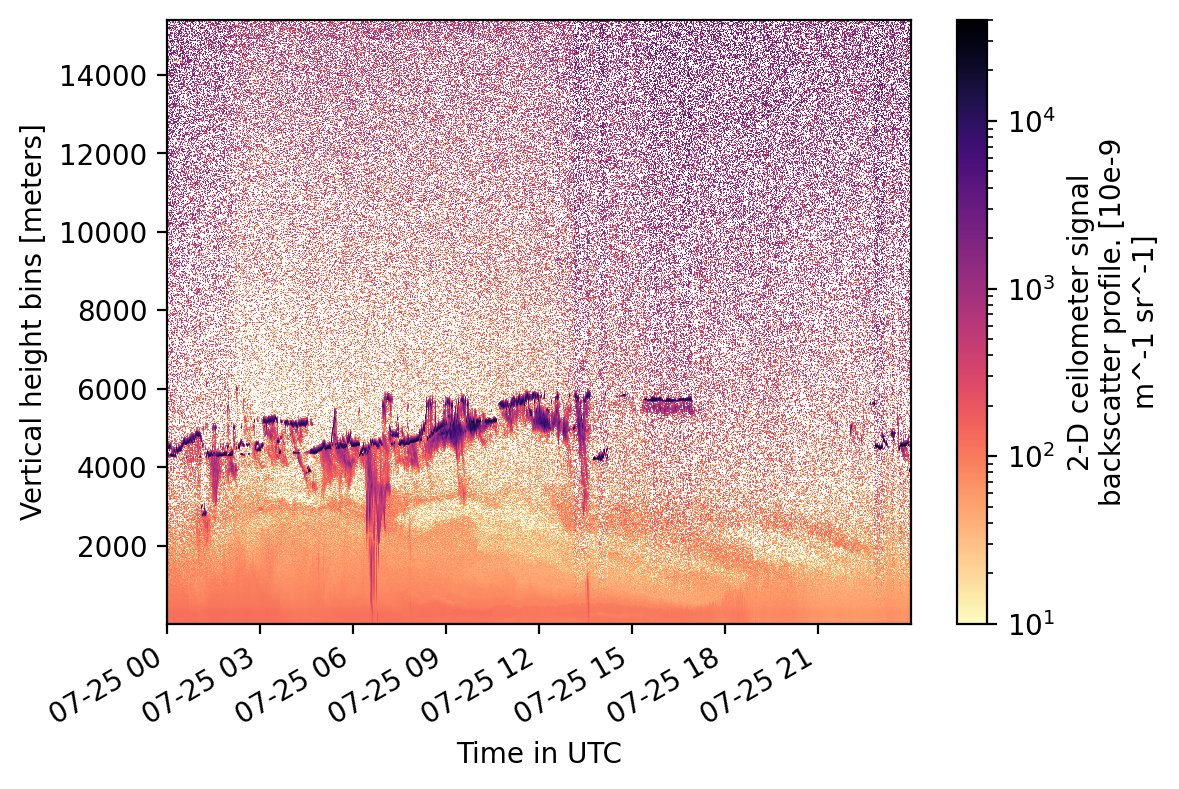

In [60]:
ps = ds.backscatter_profile.plot(x = 'time')
ps.set_cmap(plt.cm.magma_r)
ps.set_norm(mplcolors.LogNorm(vmin=1e1, vmax=4e4))
# ps.set_clim(1e1,4e4)

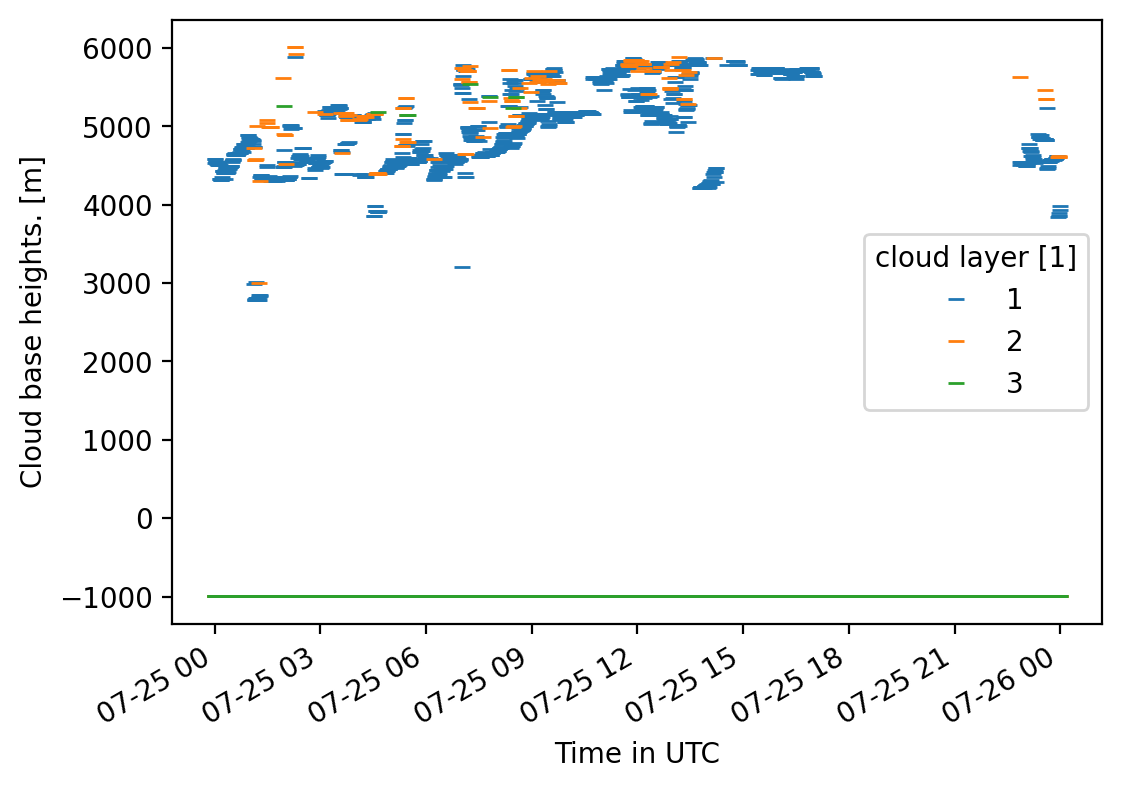

In [62]:
ds.cloud_base.plot.line(x = 'time', ls = '', marker = '_')